# Modelling Examples
#### In this notebook, we will train models with the "Deep Neural Network" class which we have written from scratch. Then we will evaluate its performance and also compare it with builtin Deep Learning API tensforflow models.

## Libraries

In [1]:
from deep_feedforward_neural_network_model import DNN
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, model_selection, preprocessing
from tensorflow.keras.datasets import mnist
# For comparing our Neural Network (NN) model with Keras NN models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-10-17 19:14:48.691583: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Function to evaluate the model

In [2]:
def dnn_model_results(model, X_train, Y_train, X_test, Y_test):
    
    print("DNN Model Results")
    
    # Learning Phase
    print("GRADIENT DESCENT CHECK")
    plt.plot(model.cost_during_training)
    plt.title("Cross Entropy Cost Value During Training")
    plt.xlabel("Iteration")
    plt.ylabel("Cross Entropy Cost")
    plt.show()
    
    # Accuracy and ROC on Train data
    print("\nTRAINING METRICS")
    train_preds = model.predict(X_train)
    train_pred_labels = train_preds > 0.5
    train_accuracy = np.sum(train_pred_labels == Y_train) / Y_train.shape[1]
    print(f"Train Accuracy: {train_accuracy}")
    train_roc_auc_score = metrics.roc_auc_score(Y_train.T, train_preds.T)
    print(f"Train ROC AUC SCORE: {train_roc_auc_score}")

    # Accuracy and ROC on Test data
    print("\nTEST METRICS")
    test_preds = model.predict(X_test)
    test_pred_labels = test_preds > 0.5
    test_accuracy = np.sum(test_pred_labels == Y_test) / Y_test.shape[1]
    print(f"Test Accuracy: {test_accuracy}")
    test_roc_auc_score = metrics.roc_auc_score(Y_test.T, test_preds.T)
    print(f"Test ROC AUC SCORE: {test_roc_auc_score}")    

In [3]:
def tenserflow_model_results(model, history, X_train, Y_train, X_test, Y_test):
    
    print("Tensorflow Model Results")
    
    # Learning Phase
    print("GRADIENT DESCENT CHECK")
    plt.plot(history.history['loss'])
    plt.title("Cross Entropy Cost Value During Training")
    plt.xlabel("Iteration")
    plt.ylabel("Cross Entropy Cost")
    plt.show()

    # Accuracy and ROC on Train data
    print("\nTRAINING METRICS")
    train_preds = model.predict(X_train)
    train_pred_labels = train_preds > 0.5
    train_accuracy = np.sum(train_pred_labels == Y_train) / Y_train.shape[0]
    print(f"Train Accuracy: {train_accuracy}")
    train_roc_auc_score = metrics.roc_auc_score(Y_train, train_preds)
    print(f"Train ROC AUC SCORE: {train_roc_auc_score}")

    # Accuracy and ROC on Test data
    print("\nTEST METRICS")
    test_preds = model.predict(X_test)
    test_pred_labels = test_preds > 0.5
    test_accuracy = np.sum(test_pred_labels == Y_test) / Y_test.shape[0]
    print(f"Test Accuracy: {test_accuracy}")
    test_roc_auc_score = metrics.roc_auc_score(Y_test, test_preds)
    print(f"Test ROC AUC SCORE: {test_roc_auc_score}")    

## IRIS Dataset test

### Model with "DNN"

In [4]:
iris = datasets.load_iris()

X = np.array(iris.data[:100])
Y = np.array(iris.target[:100])

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test = X_test.T
Y_test = Y_test.reshape(1,len(Y_test))

print(X_train.shape)
print(X_test.shape)

(4, 80)
(4, 20)


In [5]:
model = DNN()
model.train(X_train=X_train, Y_train=Y_train, layer_dims=[5,4,1], epoch=1_000)

DNN Model Results
GRADIENT DESCENT CHECK


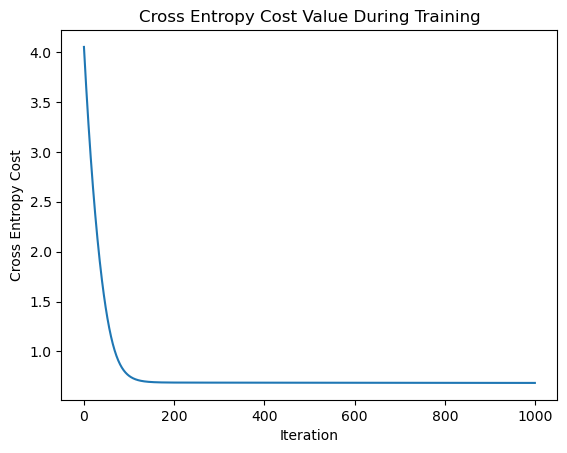


TRAINING METRICS
Train Accuracy: 0.525
Train ROC AUC SCORE: 0.9699248120300753

TEST METRICS
Test Accuracy: 0.4
Test ROC AUC SCORE: 1.0


In [6]:
dnn_model_results(model, X_train, Y_train, X_test, Y_test)

DNN Model predicts perfectly on iris test dataset

### Tensorflow Model

Tensorflow Model Results
GRADIENT DESCENT CHECK


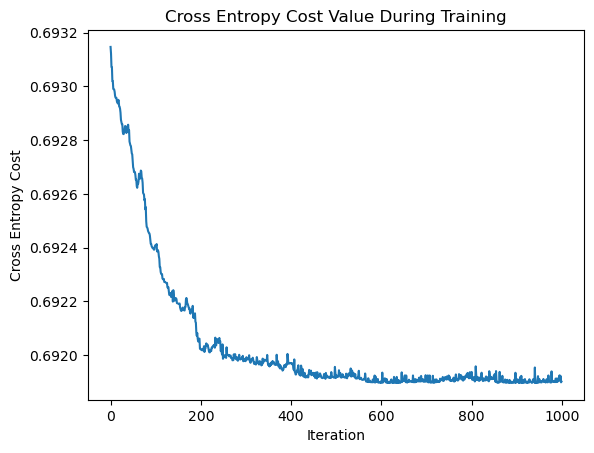


TRAINING METRICS
3/3 [==============================] - 0s 1ms/step
Train Accuracy: 0.525
Train ROC AUC SCORE: 0.5

TEST METRICS
1/1 [==============================] - 0s 18ms/step
Test Accuracy: 0.4
Test ROC AUC SCORE: 0.5


In [7]:
t_model = Sequential()

t_model.add(Dense(units=5, activation='relu', input_dim=X_train.T.shape[1]))
t_model.add(Dense(units=4, activation='relu'))
t_model.add(Dense(units=1, activation='sigmoid'))

t_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

history = t_model.fit(X_train.T, Y_train.T, epochs=1_000, batch_size=64, verbose=False)

#Evaluationg the model
tenserflow_model_results(t_model, history, X_train.T, Y_train.T, X_test.T, Y_test.T)

# Breast Cancer Data

In [8]:
# Load data
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data For Better Training and also for avoiding Zero Division Errors in the beggining of learning
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(30, 455) and (1, 455)
(30, 114) and (1, 114)


In [9]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[50, 30, 10, 1], epoch=5_000)

DNN Model Results
GRADIENT DESCENT CHECK


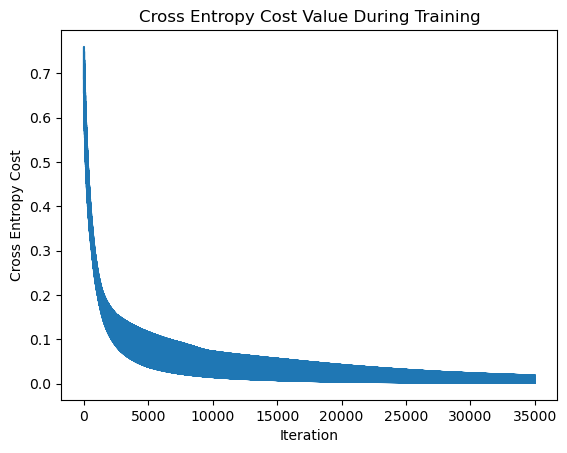


TRAINING METRICS
Train Accuracy: 1.0
Train ROC AUC SCORE: 1.0

TEST METRICS
Test Accuracy: 0.9649122807017544
Test ROC AUC SCORE: 0.9970520799213888


In [10]:
dnn_model_results(model, X_train_std, Y_train, X_test_std, Y_test)

Our network also performs well on Breast Cancer Test Dataset

Tensorflow Model Results
GRADIENT DESCENT CHECK


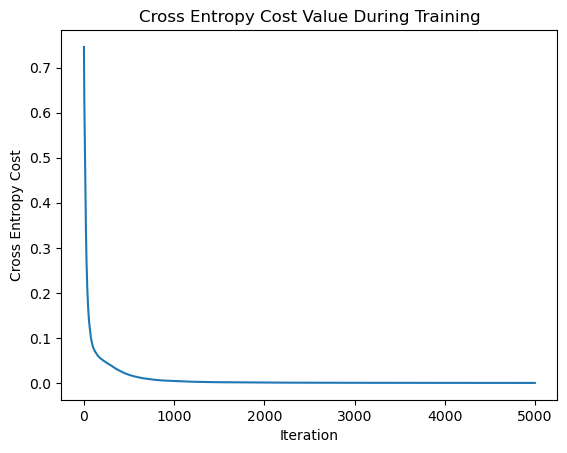


TRAINING METRICS
15/15 [==============================] - 0s 622us/step
Train Accuracy: 1.0
Train ROC AUC SCORE: 1.0

TEST METRICS
4/4 [==============================] - 0s 820us/step
Test Accuracy: 0.9736842105263158
Test ROC AUC SCORE: 0.9941041598427777


In [11]:
t_model = Sequential()

t_model.add(Dense(units=50, activation='relu', input_dim=X_train_std.T.shape[1]))
t_model.add(Dense(units=30, activation='relu'))
t_model.add(Dense(units=10, activation='relu'))
t_model.add(Dense(units=1, activation='sigmoid'))

t_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

history = t_model.fit(X_train_std.T, Y_train.T, epochs=5_000, batch_size=64, verbose=False)

#Evaluationg the model
tenserflow_model_results(t_model, history, X_train_std.T, Y_train.T, X_test_std.T, Y_test.T)

# MNIST Dataset Test

In [12]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

indices_0_1_train = np.where((Y_train == 0) | (Y_train == 1))
indices_0_1_test = np.where((Y_test == 0) | (Y_test == 1))

X_train = X_train[indices_0_1_train]
Y_train = Y_train[indices_0_1_train]

X_test = X_test[indices_0_1_test]
Y_test = Y_test[indices_0_1_test]

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize Pixel values
X_train_std = X_train / 255.0
X_test_std  = X_test / 255.0

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(784, 12665) and (1, 12665)
(784, 2115) and (1, 2115)


In [13]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[500, 200, 100, 10, 1], epoch=20)

DNN Model Results
GRADIENT DESCENT CHECK


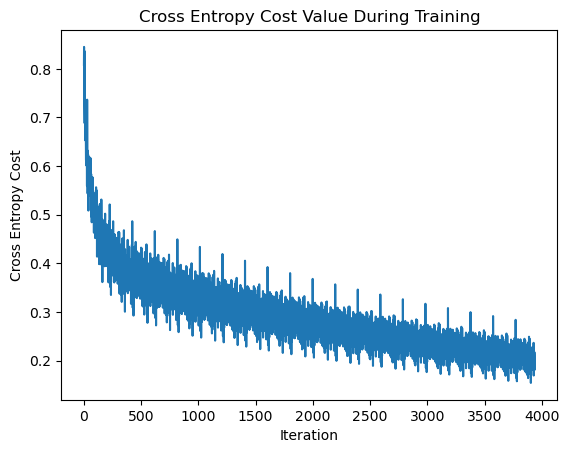


TRAINING METRICS
Train Accuracy: 0.996999605211212
Train ROC AUC SCORE: 0.9999807426794761

TEST METRICS
Test Accuracy: 0.9990543735224586
Test ROC AUC SCORE: 0.9999982019239414


In [14]:
dnn_model_results(model, X_train_std, Y_train, X_test_std, Y_test)

The model also works well on image datasets

Tensorflow Model Results
GRADIENT DESCENT CHECK


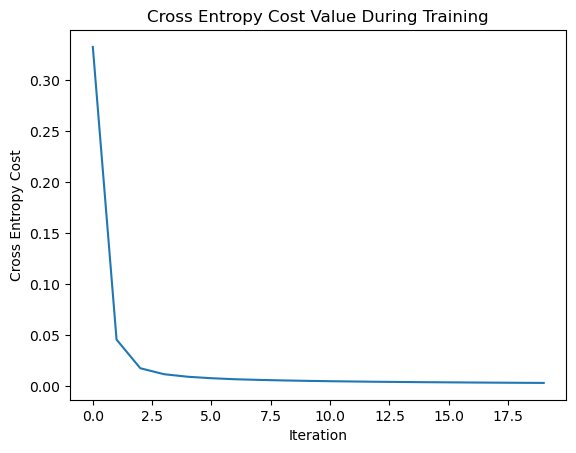


TRAINING METRICS
396/396 [==============================] - 0s 536us/step
Train Accuracy: 0.9990525069088038
Train ROC AUC SCORE: 0.9999949665521128

TEST METRICS
67/67 [==============================] - 0s 559us/step
Test Accuracy: 0.9995271867612293
Test ROC AUC SCORE: 0.999997302885912


In [15]:
t_model = Sequential()

t_model.add(Dense(units=50, activation='relu', input_dim=X_train_std.T.shape[1]))
t_model.add(Dense(units=30, activation='relu'))
t_model.add(Dense(units=10, activation='relu'))
t_model.add(Dense(units=1, activation='sigmoid'))

t_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

history = t_model.fit(X_train_std.T, Y_train.T, epochs=20, batch_size=64, verbose=False)

#Evaluationg the model
tenserflow_model_results(t_model, history, X_train_std.T, Y_train.T, X_test_std.T, Y_test.T)